# **Z3 Tutorial**

## **Set-Up**
_Please run the following code to ensure that Z3 is installed for this tutorial._

In [ ]:
!pip install z3-solver
from z3 import *

*Note: Make sure to follow along and run **all** of code cell blocks.*

## **The Z3 API [1]**

Z3 is a theorem prover from Microsoft Research, and is used in many applications such as: software/hardware verification and testing, constraint solving, security, biology, analysis of hybrid systems, and geometrical problems. [1]

This Z3 tutorial is adapted from: [Z3Py - The Z3 API in Python](https://ericpony.github.io/z3py-tutorial/guide-examples.htm) [1]

### **Variable Declaration**

Unlike in Python, in Z3 the type of the variable needs to be specified before the variable can be used. This is simple to do however and can be done as follows:


In [ ]:
x = Int('x')
y = Int('y')

This creates variables `x` and `y` which are both of type int in Z3.

Z3 also allows for declearing multiple variables of the same type in one line rather than declearing them one by one (note here the use of '`Ints`' instead of '`Int`' for the variable declaration): 

In [ ]:
x,y = Ints('x y')

Note here that `Ints('x y')` is essentially equivalent to declaring a list comprehension of Z3 terms (discussed later on): `[Int(i) for i in ["x","y"]]`

The declaration of Reals and Booleans is also available, with mutiple variables being declared using '`Reals`' and '`Bools`': 

In [ ]:
r = Real('r')
r1,r2 = Reals('r1 r2')

b = Bool('b')
b1,b2 = Bools('b1 b2')

### **Solve Function**

As mentioned, Z3 allows for constraint solving through the use of the `solve` function. It uses `<`, `<=`, `>`, `>=`, `==` and `!=` operators for comparison, and allows for basic arithmetic to occur as well.

Example:  

In [ ]:
solve(x < 5, y > 15, x + 2*y == 30)

Exercise:

Using the `solve` function, write a constraint where:
- `x` must be less than `10`, 
- `y` must be greater than or equal to `1`, and 
- `x` added to (`y` times `3`) is equal to `15`

In [ ]:
# write your answer below

### **Simplify Function**

Constraints can be simplified down from a complex form:

In [ ]:
print("-1 + y + y*4 + x + y + 2*x + 3 + y in simpler form:")
print(simplify(-1 + y + y*4 + x + y + 2*x + 3))
print()
print("And(x + 1 >= 3, x**2 + x**2 + y**2 + 2 >= 5)) in a simpler form:")
print(simplify(And(x + 1 >= 3, x**2 + x**2 + y**2 + 2 >= 5)))

### **Basic Arithmetic**

Z3 supports the following basic arithmetic operations:
- for non-linear real and non-linear integer arithmetic: 
  - addition,
  - subtraction,
  - multiplication,
  - division, and
  - raising values to a constant power e.g. `x**2` is supported but `x**y` or `2**x` is not 
- for linear real and linear integer arithmetic: 
  - addition,
  - subtraction, and
  - multiplication and division by a constant e.g. `x*3` is supported but `x*y` is not

Z3 can solve nonlinear polynomial constraints.

Integers and Reals can be used in the same expression together, as Z3, like most programming languages, can convert integers to reals when needed, using the `ToReal()` function: 

In [ ]:
x = Real('x')
y = Int('y')
a, b, c = Reals('a b c')
s, r = Ints('s r')
print(x + y + 1 + (a + s))
print(ToReal(r) + c)

Exercise: 

Declare 2 variables, `a` and `b`, to be of type int, and one variable, `c`, to be of type real. Use the `solve` function to solve the following set of constaints: 
- `a` has to be greater than `b` multiplied by 2
- `a` is equal to the sum of 6, and 2 multiplied by `c`
- the sum of `c` and `b` is less than or equal to 100

Print out the constraints to show the variables which use the `ToReal()` function.


In [ ]:
# write your answer below

### **Unsolvable Constraints**

Up until now, all of the constraints were satisfiable i.e. there is a solution for them. But sometimes a system of contstraints is unsatisfiable:

In [ ]:
x = Real('x')
solve(x > 4, x < 0)
y = Int('y')
solve(y**2 + 1 == 11)

### **Boolean Logic**

Z3 supports the following Boolean operators: `And`, `Or`, `Not`, `Implies` (implication), and `If` (if-then-else). Bi-implications are represented using equality `==`.

In [ ]:
p = Bool('p')
q = Bool('q')
r = Bool('r')
solve(Implies(p, q), r == Not(q), Or(Not(p), r))
solve(p == Not(q))

Polynomial and Boolean constraints can be used together as well.

In [ ]:
p = Bool('p')
x = Real('x')
solve(Or(x < 5, x > 10), Or(p, x**2 == 2), Not(p))

`If` example (Note here `IntVal()` assigns a value into a variable, and this is actually applied automatically whenever numbers are used within Z3 expressions, similarly with `RealVal()`):

In [ ]:
x = IntVal(5)
y = IntVal(31)

o = Int('o')

solve(If(Or(x>5,y<=10),o==100, o==0))

### **List Comprehensions**

Just like Python, Z3 supports creating lists in a concise way (note here that Z3 does not have any notion of lists, what is created instead is a Python list of Z3 terms):

In [ ]:
# List Comprehensions in Python
print([ x + 1 for x in range(5) ])

# List Comprehensions in Z3
X = [ Int('x%s' % (i+1)) for i in range(5) ]
Y = [ Int('y%s' % (i+1)) for i in range(5) ]
print(X)

In the above example, the expression `"x%s" % (i+1)` returns a string where `%s` is replaced with the value of `i+1`.

A list containing `X[i] + Y[i]` or ` X[i] > Y[i]` can be created:

In [ ]:
X_plus_Y = [ X[i] + Y[i] for i in range(5) ]
print(X_plus_Y)

X_gt_Y = [ X[i] > Y[i] for i in range(5) ]
print(X_gt_Y)

Creating a 3x3 matrix, a list of lists, of integer variables is also possible.

Note: The `pp(x)` function prints out the formatted matrix.

In [ ]:
matrix = [ [ Int("x_%s_%s" % (i+1, j+1)) for j in range(3) ] for i in range(3) ]
pp(matrix)

Lists can have constraints added to them as well e.g. when unique variable names are needed.

In [ ]:
X = [ [ Int("x_%s_%s" % (i+1, j+1)) for j in range(3) ] for i in range(3) ]
example_c1 = [ And(1 <= X[i][j], X[i][j] <= 3) for i in range(3) for j in range(3) ]
pp(example_c1)

print()

Y = [Int("x_%s" % i) for i in range(3)]
example_c2 = [ Distinct([Y[i] for i in range(3)]) ]
print(example_c2)

### **Solvers**

Z3 provides different solvers. The `solve` function, which was used in the previous examples, is implemented using the Z3 solver API. The following section is going to cover the basic Solver API available in Z3, which looks at the inputted query and then determines which specific solver would be best to run for it.

In [ ]:
x = Int('x')
y = Int('y')

# create a solver
s = Solver()
print(s)

# using add(), constraints can be asserted into the solver
s.add(x > 10, y == x + 2)
print(s)
# check() checks to see if the constraints are satisfiable
print("Solving the constraints in s")
print(s.check())
print(s.model())

The `check()` function returns: 
- `sat` (satisfiable) if a solution was found
- `unsat` (unsatisfiable) if no solution exists

General purpose solvers can be used to explore similar problems that share several constraints. 

In [ ]:
# push() creates a new scope by saving the current stack
s.push()
s.add(y < 11)
print(s)
print(s.check())

# pop() allows the solver to revert back to the satisfiable state
s.pop()
print(s)
print(s.check())

When the `check()` function returns `sat`, it can be said Z3 found a model (i.e. assignment of variables) that satisfies the set of constraints.

A model is an interpretation that makes each asserted constraint true:

In [ ]:
x, y, z = Reals('x y z')
s = Solver()
s.add(x > 1, y > 1, x + y > 3, z - x < 10)
print(s.check())

m = s.model()
print("x = %s" % m[x]) # m[x] returns the interpretation of x in the model m

# decls() return a list with all symbols that have an interpretation in the model
for declaration in m.decls():
    print("%s = %s" % (declaration.name(), m[declaration]))

solve(x > 1, y > 1, x + y > 3, z - x < 10)

Exercise:

The De Morgan's laws are a pair of transformation rules, such that:

- `not (A or B) = not A and not B`; and
- `not (A and B) = not A or not B`

Task 1) Using the solver, solve one or both of the laws, i.e. find a model. (Hint: use the `check()` function in this exercise) 

Task 2) Task 1 only finds a model to the De Morgan's laws, but does not actually prove them. In order to do so, create another function called `prove()` which takes in one argument, negates it and adds it to the solver, then check to see if the negation is unsatisfiable, if it is then print out '`proved`', otherwise '`not proved`'. Call this function on either both or one of the laws.

In [ ]:
a,b = Bools("a b")

######################################################
# Task 1 - Find a model to the De Morgan's laws
######################################################

# define the De Morgan's laws below
demorgan1 = None
demorgan2 = None

def findSolution(x):
	# use the Solver here and add the constraint to it
 
	# using the check() function on the solver
	# check to see if if a model exists or not

print("Finding a model for the De Morgan's Laws:")
print(demorgan1)
findSolution(demorgan1)

print(demorgan2)
findSolution(demorgan2)

######################################################
# Task 2 - Create a prove function to prove the De Morgan's laws
######################################################

# define the prove function below

print("Proving the De Morgan's Laws:")
# call the prove() function on the De Morgan's Laws

### **Sudoku Exercise - Challenging**

Sudoku is a very popular puzzle, where the goal is to insert the numbers in boxes in a way that satisfies the following:
- each row has to contain the digits from `1` to `n` exactly once,
- each column has to contain the digits from `1` to `n` exactly once,
- and each box in the Sudoku e.g. each `2x2` box in a `4x4` grid, has to contain the digits from 1 to `n` exactly once. 

where `n` = grid number (e.g. `n = 4` for a `4x4` grid)

The task here is to implement the following Sudoku: 

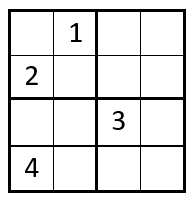

and use the Z3 Solver in order to solve it. This is a simple `4x4` grid but it can be extended to any Sudoku problem. Z3 list comprehensions, boolean logic, and the `Solver()`, `check()`, and `model()` functions should be used in order to complete this exercise. 

Below is a program template that should be used as a starting point for this extercise. 

In [ ]:
# 4x4 matrix of integer variables
X = [ [ Int("x_%s_%s" % (i+1, j+1)) for j in range(4) ]
      for i in range(4) ]

# each cell has to contain a value  from 1, ..., 4
cells_c = #to be filled out

# each row has to contain a digit at most once
# hint: use the Distinct() here
rows_c = #to be filled out

# each column has to contain a digit at most once
# hint: use the Distinct() here
cols_c = #to be filled out

# each 2x2 square contains a digit at most once
sq_c = [ Distinct([ X[2*i0 + i][2*j0 + j]
                        for i in range(2) for j in range(2) ])
             for i0 in range(2) for j0 in range(2) ]

sudoku_c = cells_c + rows_c + cols_c + sq_c

# sudoku instance uses '0' for empty cells
# add the above sudoku to this
instance = ((0,0,0,0),
            (0,0,0,0),
            (0,0,0,0),
            (0,0,0,0))

instance_c = [ If(instance[i][j] == 0,
                  True,
                  X[i][j] == instance[i][j])
               for i in range(4) for j in range(4) ]

# create a solver and add the sudoku and instance constraints to it 

if s.check() == sat:
    # create a model 
    
    r = [ [ m.evaluate(X[i][j]) for j in range(4) ]
          for i in range(4) ]
    # print the matrix out
    
else:
    print("Cannot solve this Sudoku Puzzle")

# **References**

*1. Z3Py Guide [Internet]. [cited 2020 Oct 3]. Available from: https://ericpony.github.io/z3py-tutorial/guide-examples.htm*
